In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ydata_profiling import ProfileReport

In [2]:
#Read in first dataset Telco_customer_churn_status.xlsx
df_churn = pd.read_excel("/Users/vincecoletti/Desktop/Coding/SpringBoard_Projects/Springboard_Capstone_2/raw_data_telco/Telco_customer_churn_status.xlsx")
df_churn.head()

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [3]:
df_churn.tail()

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
7038,HNJTLH8249,2569-WGERO,1,Q3,5,Stayed,No,0,45,5306,NaN,NaN
7039,SJJDWW6147,6840-RESVB,1,Q3,3,Stayed,No,0,59,2140,NaN,NaN
7040,AODCBE7865,2234-XADUH,1,Q3,4,Stayed,No,0,71,5560,NaN,NaN
7041,GLQPEW3973,4801-JZAZL,1,Q3,4,Stayed,No,0,59,2793,NaN,NaN
7042,KCNRPQ8327,3186-AJIEK,1,Q3,4,Stayed,No,0,38,5097,NaN,NaN


In [4]:
df_churn.describe()

,Count,Satisfaction Score,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,3.244924,0.265370,58.505040,4400.295755
std,0.0,1.201657,0.441561,21.170031,1183.057152
min,1.0,1.000000,0.000000,5.000000,2003.000000
25%,1.0,3.000000,0.000000,40.000000,3469.000000
50%,1.0,3.000000,0.000000,61.000000,4527.000000
75%,1.0,4.000000,1.000000,75.500000,5380.500000
max,1.0,5.000000,1.000000,96.000000,6500.000000


In [5]:
df_churn.dtypes

Status ID             object
Customer ID           object
Count                  int64
Quarter               object
Satisfaction Score     int64
Customer Status       object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Category        object
Churn Reason          object
dtype: object

In [6]:
df_churn.shape

(7043, 12)

In [7]:
df_churn.count()

Status ID             7043
Customer ID           7043
Count                 7043
Quarter               7043
Satisfaction Score    7043
Customer Status       7043
Churn Label           7043
Churn Value           7043
Churn Score           7043
CLTV                  7043
Churn Category        1869
Churn Reason          1869
dtype: int64

In [8]:
df_churn[df_churn.duplicated()]

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason


In [9]:
#No duplicate observations found

In [10]:
df_churn["Count"].value_counts()

Count
1    7043
Name: count, dtype: int64

In [11]:
df_churn["Quarter"].value_counts()

Quarter
Q3    7043
Name: count, dtype: int64

In [12]:
#Dropping Count & Quarter as all values are 1 & Q3 respectively and provide no further value to this analysis
df_churn.drop(columns=['Count', 'Quarter'], inplace=True)

In [13]:
df_churn["Churn Label"].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [14]:
df_churn["Churn Value"].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [15]:
#Churn Label & Churn Value show 2 ways of counting the same via Yes/No or 1/0. Preserving both for now.

In [16]:
#Filling NaN missing values for 5,174 customers who did not churn so resulting dataframe is not missing any values.
df_churn['Churn Reason'].fillna('Did Not Churn', inplace=True)

In [17]:
df_churn["Churn Reason"].value_counts()

Churn Reason
Did Not Churn                                5174
Competitor had better devices                 313
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                          46
Extra data charges                             39
Limited range of services                      37
Poor expertise of online support               31
Lack of affordable download/upload speed       30
Lack of self-service on Website                29
Poor expertise of phone support      

In [18]:
df_churn['Churn Category'].fillna('Did Not Churn', inplace=True)

In [19]:
df_churn["Churn Category"].value_counts()

Churn Category
Did Not Churn      5174
Competitor          841
Attitude            314
Dissatisfaction     303
Price               211
Other               200
Name: count, dtype: int64

In [20]:
#Create 4 new columns consolidating categories of cancellation reasons
cancellation_categories = {
    'Employee Related Cancellation': ['Attitude of support person', 'Attitude of service provider', 
                                      'Service dissatisfaction', 'Poor expertise of phone support', 
                                      'Poor expertise of online support'],
    'Product/Service Related Cancellation': ['Network reliability', 'Product dissatisfaction', 
                                             'Service dissatisfaction', 'Limited range of services',
                                            'Lack of self-service on Website'],
    'Competitor Cancellation': ['Competitor offered higher download speeds', 'Competitor offered more data', 
                                'Competitor made better offer', 'Competitor had better devices'],
    'Price Cancellation': ['Price too high', 'Extra data charges', 'Long distance charges', 
                           'Lack of affordable download/upload speed']
}

df_churn['Employee Related Cancellation'] = 0
df_churn['Product/Service Related Cancellation'] = 0
df_churn['Competitor Cancellation'] = 0
df_churn['Price Cancellation'] = 0

for category, reasons in cancellation_categories.items():
    for reason in reasons:
        df_churn[category] += df_churn['Churn Reason'].eq(reason).astype(int)

df_churn.head()

,Status ID,Customer ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Employee Related Cancellation,Product/Service Related Cancellation,Competitor Cancellation,Price Cancellation
0,SWSORB1252,8779-QRDMV,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,0,0,1,0
1,SNAEQA8572,7495-OOKFY,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,0,0,1,0
2,LMBQNN3714,1658-BYGOY,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,0,0,1,0
3,VRZYZI9978,4598-XLKNJ,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,0,1,0,0
4,FDNAKX1688,4846-WHAFZ,2,Churned,Yes,1,67,2793,Price,Extra data charges,0,0,0,1


In [21]:
#Read in second dataset Telco_customer_churn_services.xlsx
df_services = pd.read_excel("/Users/vincecoletti/Desktop/Coding/SpringBoard_Projects/Springboard_Capstone_2/raw_data_telco/Telco_customer_churn_services.xlsx")
df_services.head()

,Service ID,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,IJKDQVSWH3522,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,BFKMZJAIE2285,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,EIMVJQBMT7187,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,EROZQXDUU4979,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,GEEYSJUHY6991,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [22]:
df_services.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [23]:
df_services.dtypes

Service ID                            object
Customer ID                           object
Count                                  int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract  

In [24]:
df_services.shape

(7043, 31)

In [25]:
df_services.count()

Service ID                           7043
Customer ID                          7043
Count                                7043
Quarter                              7043
Referred a Friend                    7043
Number of Referrals                  7043
Tenure in Months                     7043
Offer                                3166
Phone Service                        7043
Avg Monthly Long Distance Charges    7043
Multiple Lines                       7043
Internet Service                     7043
Internet Type                        5517
Avg Monthly GB Download              7043
Online Security                      7043
Online Backup                        7043
Device Protection Plan               7043
Premium Tech Support                 7043
Streaming TV                         7043
Streaming Movies                     7043
Streaming Music                      7043
Unlimited Data                       7043
Contract                             7043
Paperless Billing                 

In [26]:
#Offer & Internet Type missing entries

In [27]:
df_services["Offer"].value_counts()

Offer
Offer B    824
Offer E    805
Offer D    602
Offer A    520
Offer C    415
Name: count, dtype: int64

In [28]:
#Fill NaN missing Offer entries as Unknown/None
df_services['Offer'].fillna('Unknown/None', inplace=True)

In [29]:
df_services["Internet Service"].value_counts()

Internet Service
Yes    5517
No     1526
Name: count, dtype: int64

In [30]:
df_services["Internet Type"].value_counts()

Internet Type
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64

In [31]:
#Fill NaN missing Internet Type entries as None. Those customers do not have internet service.
df_services['Internet Type'].fillna('None', inplace=True)

In [32]:
missing_values = df_services.isnull().sum()
missing_values

Service ID                           0
Customer ID                          0
Count                                0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge           

In [33]:
df_services["Count"].value_counts()

Count
1    7043
Name: count, dtype: int64

In [34]:
df_services["Quarter"].value_counts()

Quarter
Q3    7043
Name: count, dtype: int64

In [35]:
#Dropping Count & Quarter as all values are 1 & Q3 respectively and provide no further value to this analysis
df_services.drop(columns=['Count', 'Quarter'], inplace=True)

In [36]:
merged_df1 = df_churn.merge(df_services, on='Customer ID', how='outer')
merged_df1.head()
#for column in df_status.columns:
   # if column in df_churn.columns:
       # merged_df[column] = merged_df[column].combine_first(merged_df[column+'_y'])

#merged_df = merged_df.drop([col+'_y' for col in df_status.columns], axis=1)

#merged_df = merged_df.rename(columns={col: col+'_status' for col in df_status.columns})

,Status ID,Customer ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,SWSORB1252,8779-QRDMV,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,SNAEQA8572,7495-OOKFY,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,LMBQNN3714,1658-BYGOY,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,VRZYZI9978,4598-XLKNJ,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,FDNAKX1688,4846-WHAFZ,2,Churned,Yes,1,67,2793,Price,Extra data charges,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [37]:
merged_df1.shape

(7043, 42)

In [38]:
merged_df1.count()

Status ID                               7043
Customer ID                             7043
Satisfaction Score                      7043
Customer Status                         7043
Churn Label                             7043
Churn Value                             7043
Churn Score                             7043
CLTV                                    7043
Churn Category                          7043
Churn Reason                            7043
Employee Related Cancellation           7043
Product/Service Related Cancellation    7043
Competitor Cancellation                 7043
Price Cancellation                      7043
Service ID                              7043
Referred a Friend                       7043
Number of Referrals                     7043
Tenure in Months                        7043
Offer                                   7043
Phone Service                           7043
Avg Monthly Long Distance Charges       7043
Multiple Lines                          7043
Internet S

In [39]:
#Read in third dataset Telco_customer_churn_demographics.xlsx
df_demo = pd.read_excel("/Users/vincecoletti/Desktop/Coding/SpringBoard_Projects/Springboard_Capstone_2/raw_data_telco/Telco_customer_churn_demographics.xlsx")
df_demo.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [40]:
df_demo.describe()

,Count,Age,Number of Dependents
count,7043.0,7043.000000,7043.000000
mean,1.0,46.509726,0.468692
std,0.0,16.750352,0.962802
min,1.0,19.000000,0.000000
25%,1.0,32.000000,0.000000
50%,1.0,46.000000,0.000000
75%,1.0,60.000000,0.000000
max,1.0,80.000000,9.000000


In [41]:
#An outlier of 9 dependents found

In [42]:
df_demo.dtypes

Customer ID             object
Count                    int64
Gender                  object
Age                      int64
Under 30                object
Senior Citizen          object
Married                 object
Dependents              object
Number of Dependents     int64
dtype: object

In [43]:
df_demo.shape

(7043, 9)

In [44]:
df_demo.count()

Customer ID             7043
Count                   7043
Gender                  7043
Age                     7043
Under 30                7043
Senior Citizen          7043
Married                 7043
Dependents              7043
Number of Dependents    7043
dtype: int64

In [45]:
df_demo["Count"].value_counts()

Count
1    7043
Name: count, dtype: int64

In [46]:
#Dropping Count as all values are 1 and provide no further value to this analysis
df_demo.drop(columns=['Count'], inplace=True)

In [47]:
merged_df2 = merged_df1.merge(df_demo, on='Customer ID', how='outer')
merged_df2.head()

,Status ID,Customer ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,SWSORB1252,8779-QRDMV,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,...,20,0.00,59.65,Male,78,No,Yes,No,No,0
1,SNAEQA8572,7495-OOKFY,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,...,0,390.80,1024.10,Female,74,No,Yes,Yes,Yes,1
2,LMBQNN3714,1658-BYGOY,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,...,0,203.94,1910.88,Male,71,No,Yes,No,Yes,3
3,VRZYZI9978,4598-XLKNJ,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,...,0,494.00,2995.07,Female,78,No,Yes,Yes,Yes,1
4,FDNAKX1688,4846-WHAFZ,2,Churned,Yes,1,67,2793,Price,Extra data charges,...,0,234.21,3102.36,Female,80,No,Yes,Yes,Yes,1


In [48]:
#Read in fourth dataset Telco_customer_churn_location.xlsx
df_location = pd.read_excel("/Users/vincecoletti/Desktop/Coding/SpringBoard_Projects/Springboard_Capstone_2/raw_data_telco/Telco_customer_churn_location.xlsx")
df_location.head()

,Location ID,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,OXCZEW7397,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,FCCECI8494,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,HEHUQY7254,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,WIUHRF2613,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,CFEZBF4415,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [49]:
df_location.dtypes

Location ID     object
Customer ID     object
Count            int64
Country         object
State           object
City            object
Zip Code         int64
Lat Long        object
Latitude       float64
Longitude      float64
dtype: object

In [50]:
#Convert ZIP Codes to strings
df_location['Zip Code'] = df_location['Zip Code'].astype(str)

In [51]:
df_location.shape

(7043, 10)

In [52]:
df_location.count()

Location ID    7043
Customer ID    7043
Count          7043
Country        7043
State          7043
City           7043
Zip Code       7043
Lat Long       7043
Latitude       7043
Longitude      7043
dtype: int64

In [53]:
df_location["Count"].value_counts()

Count
1    7043
Name: count, dtype: int64

In [54]:
df_location["Country"].value_counts()

Country
United States    7043
Name: count, dtype: int64

In [55]:
#Dropping Count & Country as all values are 1 and United States respectively and provide no further value to this analysis
df_location.drop(columns=['Count', 'Country'], inplace=True)

In [56]:
#Dropping Lat Long, Latitude, & Longitude. We already have State, City, & Zip. For our analysis, coordinate data is not needed
df_location.drop(columns=['Lat Long', 'Latitude', 'Longitude'], inplace=True)

In [57]:
df_location

,Location ID,Customer ID,State,City,Zip Code
0,OXCZEW7397,8779-QRDMV,California,Los Angeles,90022
1,FCCECI8494,7495-OOKFY,California,Los Angeles,90063
2,HEHUQY7254,1658-BYGOY,California,Los Angeles,90065
3,WIUHRF2613,4598-XLKNJ,California,Inglewood,90303
4,CFEZBF4415,4846-WHAFZ,California,Whittier,90602
...,...,...,...,...,...
7038,XVCVGG7664,2569-WGERO,California,Landers,92285
7039,NOTKAT3139,6840-RESVB,California,Adelanto,92301
7040,IIQJBU2929,2234-XADUH,California,Amboy,92304
7041,PBNAHR7564,4801-JZAZL,California,Angelus Oaks,92305


In [58]:
cleaned_churn_df = merged_df2.merge(df_location, on='Customer ID', how='outer')
cleaned_churn_df.head()

,Status ID,Customer ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,...,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Location ID,State,City,Zip Code
0,SWSORB1252,8779-QRDMV,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,...,78,No,Yes,No,No,0,OXCZEW7397,California,Los Angeles,90022
1,SNAEQA8572,7495-OOKFY,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,...,74,No,Yes,Yes,Yes,1,FCCECI8494,California,Los Angeles,90063
2,LMBQNN3714,1658-BYGOY,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,...,71,No,Yes,No,Yes,3,HEHUQY7254,California,Los Angeles,90065
3,VRZYZI9978,4598-XLKNJ,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,...,78,No,Yes,Yes,Yes,1,WIUHRF2613,California,Inglewood,90303
4,FDNAKX1688,4846-WHAFZ,2,Churned,Yes,1,67,2793,Price,Extra data charges,...,80,No,Yes,Yes,Yes,1,CFEZBF4415,California,Whittier,90602


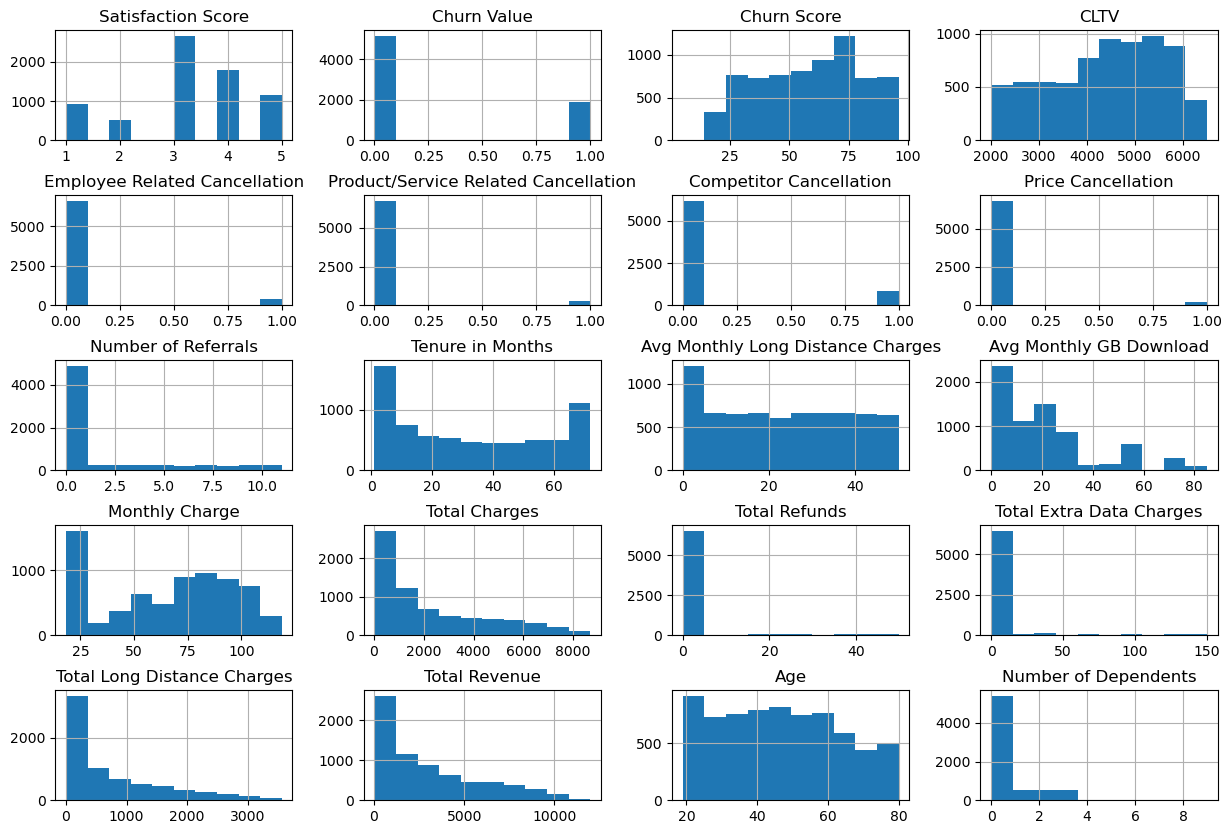

In [59]:
#Distributions of the merged data
cleaned_churn_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

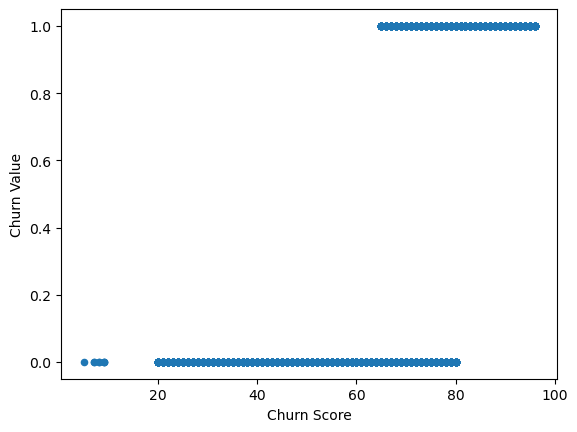

In [60]:
#Preliminary findings:
#If Churn Score > 80, customer will almost assurdely churn.
#If 65 < Churn Score < 80, customer may churn.
#If Churn Score < 65, customer will not churn.

cleaned_churn_df.plot(x='Churn Score', y='Churn Value', kind="scatter");

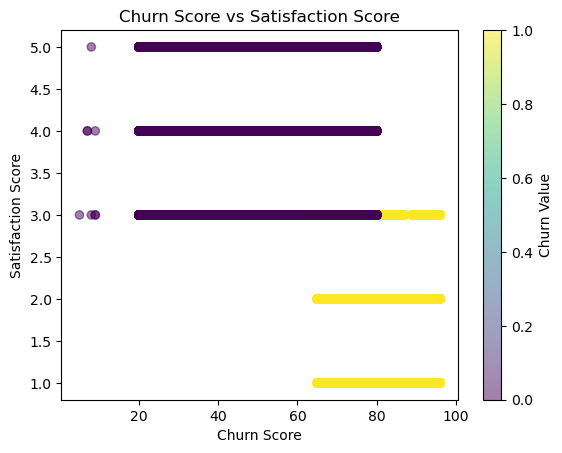

In [61]:
#Preliminary findings:
#If Satisfaction Score >= 4, customer will not churn.
#If Satisfaction Score <= 2, customer will churn.
#If Satisfaction Score == 3, customer may churn if churn score is also high.

plt.scatter(x='Churn Score', y='Satisfaction Score', c='Churn Value', alpha=.5, data=cleaned_churn_df)
plt.xlabel('Churn Score')
plt.ylabel('Satisfaction Score')
plt.colorbar(label='Churn Value')
plt.title('Churn Score vs Satisfaction Score')
plt.show()

In [62]:
#Save DataFrame as CSV
cleaned_churn_df.to_csv('/Users/vincecoletti/Desktop/Coding/SpringBoard_Projects/Springboard_Capstone_2/data/Cleaned_Churn_Data.csv', index=False)

**Summary**

Four complimentary datasets for Telco churn were identified for this project.

The first dataset, 'Telco_customer_churn_status.xlsx', was imported and inspected via summary statistics, as well as datatypes per column, number of observations, missing values, & duplicates. Data did not have any duplicated rows and missing values were isolated to 'Churn Category' & 'Churn Reason'.

'Count' & 'Quarter' columns were dropped as all values were 1 & Q3 respectively and provide no further value to this analysis.

Found 'Churn Category' & 'Churn Reason' missing values were because the rest of the observations did not churn so filled missing values for these columns to 'Did Not Churn' to ensure no missing values in the DataFrame.

Created four new columns consolidating categories of cancellation reasons to binary for potential use in modeling at a later stage.

The second dataset, 'Telco_customer_churn_services.xlsx', was imported and a similar inspection was done. Missing values were isolated to 'Offer' and 'Internet Type'. 'Offer' missing values were filled with 'Unknown/None'. After inspecting which customers had internet service, I found that the missing values in 'Internet Type' was due to those customers not receiving internet services from Telco. Filled missing values with 'None'.

'Count' and 'Quarter' were dropped in this dataset as well.

The 'churn_status' & 'services' dataframes were merged as merged_df1 and checked for completeness.

The third dataset, 'Telco_customer_churn_demographics.xlsx', was imported and inspected similarly to the first two datasets.

An outlier of 9 dependents was found but was left in. 'Count' was similarly dropped.

The 'demographics' DataFrame was merged with the prior merged DataFrame as merged_df2.

The final dataset, 'Telco_customer_churn_location.xlsx', was imported and a similar inspection was done.

Dataset had no missing values. 'Zip Codes' values were converted to strings to ensure that any potential leading 0's were not dropped.

'Count' & 'Country' were dropped as all values are and 'United States' respectively and provide no further value to this analysis.

'Lat Long', 'Latitude', & 'Longitude' columns were dropped. We already have State, City, & Zip. For our analysis, coordinate data is not beneficial.

The 'location' DataFrame was merged with the prior merged DataFrame, merged_df2, as cleaned_churn_df.

Distributions of numeric data were also created and we can see some preliminary relationships between 'Satisfaction Score', 'Churn Score', & 'Churn Value' already taking place.

These relationships were visualized further in additional plots and we found that:
If Churn Score > 80, customer will almost assurdely churn.
If 65 < Churn Score < 80, customer may churn.
If Churn Score < 65, customer will not churn.
If Satisfaction Score >= 4, customer will not churn.
If Satisfaction Score <= 2, customer will churn.
If Satisfaction Score == 3, customer may churn if churn score is also high.

These relationships as well as others will be explored at a later stage.

Lastly, the cleaned_churn_df was exported to csv & saved.